In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from gapminder import gapminder

## Load the gapminder data
We load the data and look at the population development of a few example countries.

Let's have a look at `gapminder`, which is a python dataframe

In [2]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
gapminder.year.min(), gapminder.year.max()

(1952, 2007)

For a few example countries, we filter the dataframe to contain only data from that country, and plot the population

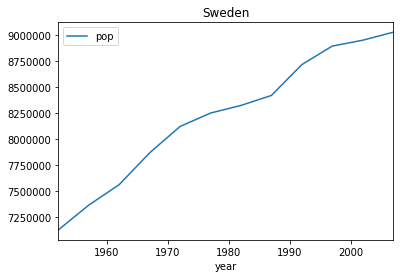

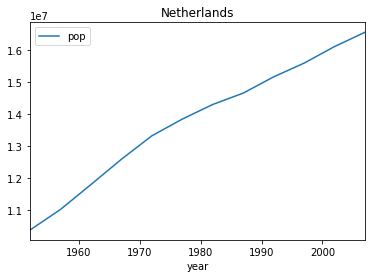

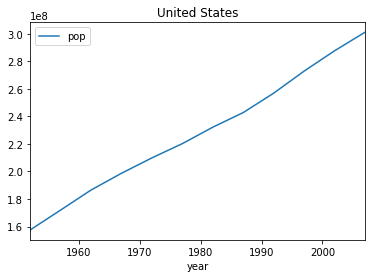

In [4]:
for country in ['Sweden', 'Netherlands', 'United States']:
    df_country = gapminder[gapminder.country==country]
    df_country.plot(x='year', y='pop')
    plt.title(country)

## Exponential model
A popular model for population growth is the exponential growth model:

`P(t) = P_0 e^(k(t-t_0))`

We create a function that ouputs the value for an input `dt=t-t0`, and the model parameters `p0` and `k`. We use the library numpy for our calculations, so they will automatically work on arrays of data (as well as single values)

In [2]:
import numpy as np

def model_exponential(dt, p0, k):
    return p0 * np.exp(k*dt)

Let's try out this function. Suppose if we have a starting population of 1M and a growth rate of 1.01 per year. What will be the population size after 5 years?

In [4]:
p0 = 1e6
k = 1.01
print(model_exponential(5, p0, k))

156022464.48639497


We can also apply the function on an array. So we calculate it for each year in one go:

In [6]:
dt = np.arange(0,6)
print(dt)

[0 1 2 3 4 5]


In [10]:
population = model_exponential(dt, p0, k)
print(population)

[1.00000000e+06 2.74560102e+06 7.53832493e+06 2.06972326e+07
 5.68263428e+07 1.56022464e+08]


These numbers are a bit difficult to read, so we will plot in a barchart them using `matplotlib.pyplot`

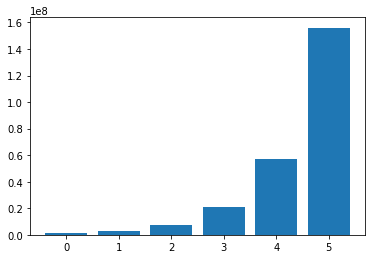

In [13]:
plt.bar(x=dt, height=population)
plt.show()

As the numbers grow exponentially, it may be useful to have a log scale axis in our plot:

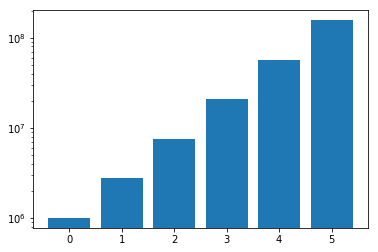

In [14]:
plt.bar(x=dt, height=population)
plt.yscale('log')
plt.show()

Now we will try to find parameters to fit the exponential curve on the growth data of the US. Let's first get the relevant data from the dataframe and convert the data to numpy arrays:

In [16]:
df_us = gapminder[gapminder.country=='United States']
df_us.sort_values('year')
df_us

,country,continent,year,lifeExp,pop,gdpPercap
1608,United States,Americas,1952,68.440,157553000,13990.48208
1609,United States,Americas,1957,69.490,171984000,14847.12712
1610,United States,Americas,1962,70.210,186538000,16173.14586
1611,United States,Americas,1967,70.760,198712000,19530.36557
1612,United States,Americas,1972,71.340,209896000,21806.03594
1613,United States,Americas,1977,73.380,220239000,24072.63213
1614,United States,Americas,1982,74.650,232187835,25009.55914
1615,United States,Americas,1987,75.020,242803533,29884.35041
1616,United States,Americas,1992,76.090,256894189,32003.93224
1617,United States,Americas,1997,76.810,272911760,35767.43303


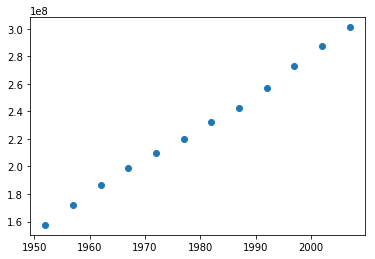

In [17]:
t = df_us['year'].values
dt = t - t.min()
y_observed = df_us['pop'].values

plt.scatter(t, y_observed)
plt.show()

We use the first and last points to guess p0 and k. We use these guessed parameters to predict the population for each t.

Guess for p0: 157553000
Guess for k: 0.011778421587289244


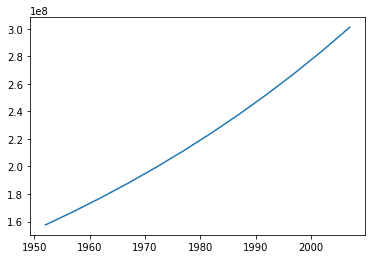

In [22]:
# Initial guess for paramters:
p0_guessed = y_observed.min()
k_guessed = np.log(y_observed[-1]/p0_guessed)/dt[-1]

print('Guess for p0: {}'.format(p0_guessed))
print('Guess for k: {}'.format(k_guessed))

y_guessed = model_exponential(dt, p0_guessed, k_guessed)

plt.plot(t, y_guessed)
plt.show()

We can plot both the model prediction and the observed values in one plot:

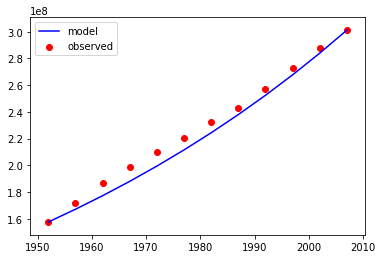

In [23]:
plt.plot(t, y_guessed, label='model', color='blue')
plt.scatter(t, y_observed, label='observed', color='red')
plt.legend()
plt.show()

### Excercise
Make an exponential model with guessed parameters for your country of choice.

In [24]:
# Fill in

Now we will use the curve fitting method of scipy. We can give it our inital guesses of the parameters.

In [25]:
from scipy.optimize import curve_fit

In [26]:
curve_fit?

In [27]:
(p0_fitted, k_fitted), pcov = curve_fit(model_exponential, dt, y_observed, p0=[p0_guessed, k_guessed])

In [28]:
print(p0_fitted, k_fitted)

165186819.34609535 0.011094163737828887


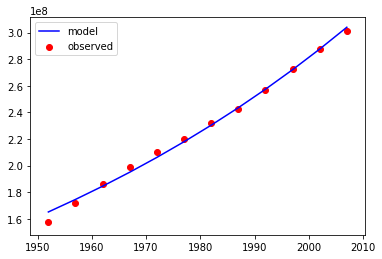

In [29]:
y_fitted = model_exponential(dt, p0_fitted, k_fitted)
plt.plot(t, y_fitted, label='model', color='blue')
plt.scatter(t, y_observed, label='observed', color='red')
plt.legend()
plt.show()

## Logistic growth model
The logistic growth model models an S curve, as opposed to the J curve (ever growing more!) of the exponential model. It's modeled by:

`P(t) = P_m / (1 + (P_m / P_0 - 1) e^(-k(t-t0)))`


Note that next to the initial population size P0, we also have the parameter P_m denoting the maximum population

### Excercise
Define a function, similar to `model_exponential`, that returns the value of the model for a given dt, P_0, P_m and k.

In [31]:
# Solution:
def model_logistic(dt, p0, pm, k):
    return pm / (1 + (pm/p0 - 1) * np.exp(-k*dt))

We can make initial guesses for the parameter, but especially for k it is a bit more tricky. So let's immediately go to the curve fitting function

In [33]:
(p0_fitted, pm_fitted, k_fitted), pcov = curve_fit(model_logistic, dt, y_observed) 

C:\Users\DafnevanKuppevelt\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Hm, it gives us a warning that the fitting could not be optimized. Let's help the curve fitting with some rough estimates. P_0 and P_1 are easy to guess, they are the minimum and maximum value. For k, we just start from 1.

__NB:__ It is possible to work out the math, and guess the value of k from a third point.

In [34]:
p0_guessed = y_observed.min()
pm_guessed = y_observed.max()
k_guessed = 1

(p0_fitted, pm_fitted, k_fitted), pcov = curve_fit(model_logistic, dt, y_observed, p0 = (p0_guessed, pm_guessed, k_guessed)) 

In [35]:
print(p0_fitted, pm_fitted, k_fitted)

161519617.0014204 614264750.419242 0.01792013516982666


### Exercise:
plot the observed population of your favorite country against those predicted by the logistic model

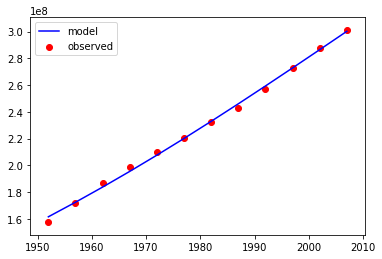

In [36]:
# Solution
y_fitted = model_logistic(dt, p0_fitted, pm_fitted, k_fitted)
plt.plot(t, y_fitted, label='model', color='blue')
plt.scatter(t, y_observed, label='observed', color='red')
plt.legend()
plt.show()